### Descriptive analytics for numerical columns 

In [1]:
# load pandas library
import pandas as pd

In [2]:
# load the data sheet from the source 
sales_data = pd.read_csv('/DataScienceNotes/Assignments/03-Basic Stats -1/sales_data_with_discounts.csv')

In [3]:
# check the file loaded properly
sales_data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
# find any null values in any column
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
# Identifying the numerical column and,
# check the min, max, standerd diviation, mean and quaterly values 
sales_data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [6]:
# sales_data['City'].value_counts()

In [7]:
# finding the individual mean of column
sales_data['Avg Price'].mean()

10453.433333333332

In [8]:
# finding the median
sales_data['Discount Amount'].median()

988.9337332382784

In [9]:
# most repetedly occured values in BU column
sales_data['BU'].mode()

0         FMCG
1    Lifestyle
2      Mobiles
Name: BU, dtype: object

In [10]:
# find std deviation
sales_data['Total Sales Value'].std()

50535.07417255328

### Data Visualization 

In [11]:
# to plot load the matplot library
import matplotlib.pyplot as plt

### Histogram

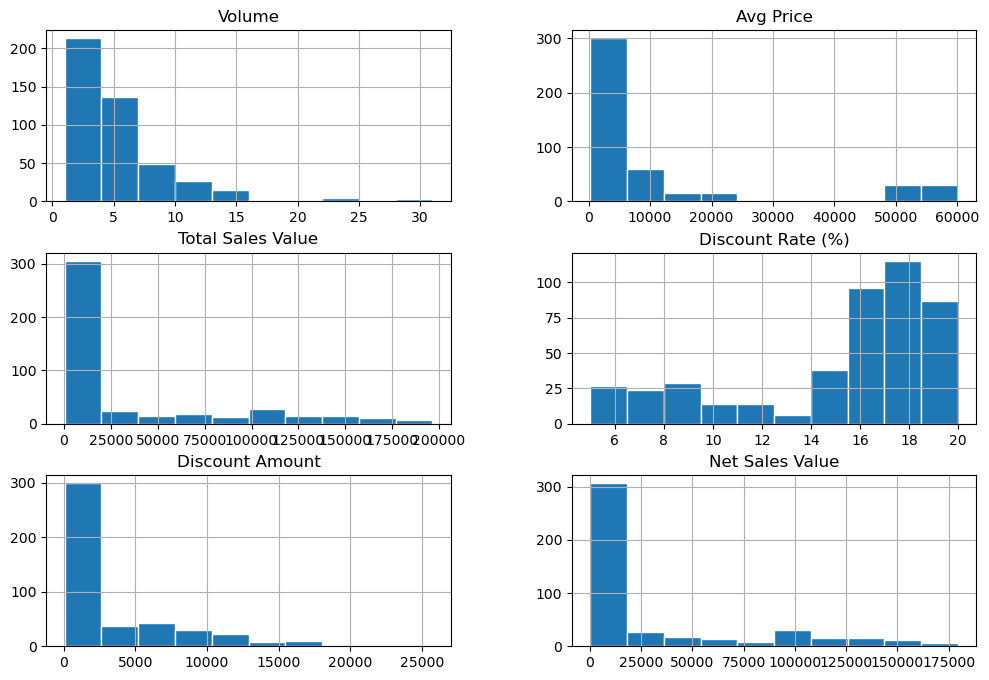

In [12]:
# one way directly plot the all the plots just giving size of plot and the bins
# plot histogram plot for all the numerical column
sales_data.hist(figsize=(12, 8), bins=10, edgecolor='white')
plt.show()

#### By looking at ehe above histogram plots we didn't find any noramal probability distribution, finding most 
#### of them as right skewed data and the discount rate is left skewed data.
#### Note: As discount rate is goes on incresed and the net sales and avg price were goes down.
#### we can plot the charts individual also.

In [13]:
# taking all the numerical columns separatly and loop through it 
# and plot each hist plot giving all the features of each plot.

# get all the numerical columns
num_col = sales_data.select_dtypes(include= ['int64', 'float64']).columns

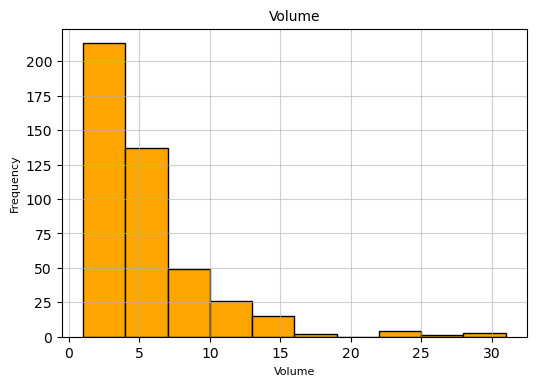

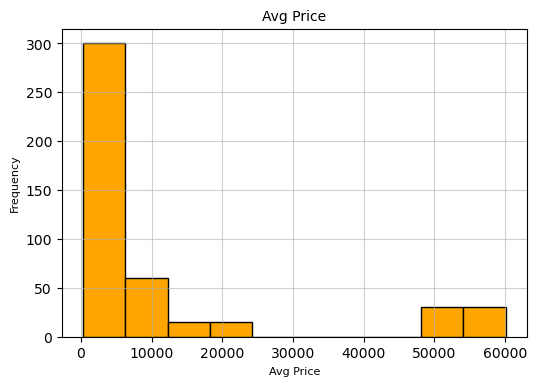

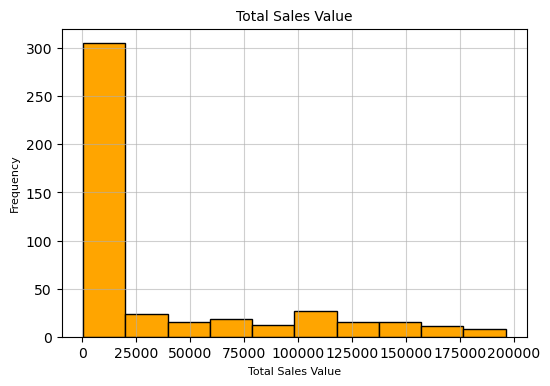

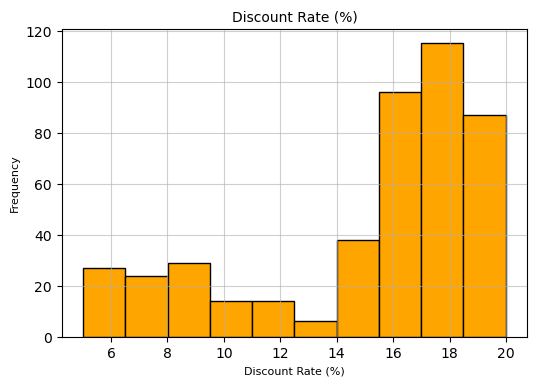

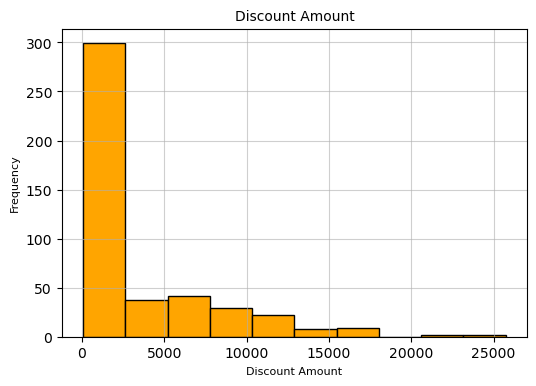

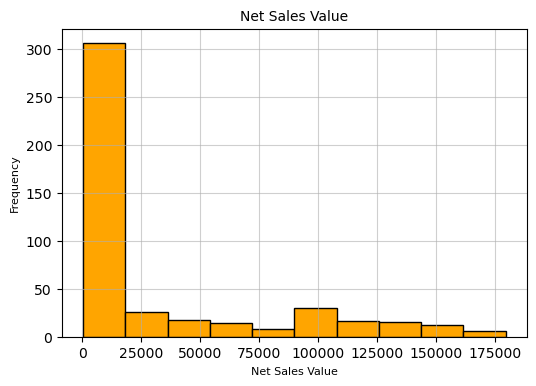

In [14]:
# plot each histogram separatly
for col in num_col:
    plt.figure(figsize=(6,4))
    plt.hist(sales_data[col].dropna(), bins=10, color= 'orange', edgecolor= 'black')
    plt.title(col, fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.grid(True, alpha=0.6)
    plt.show()

### Box Plot

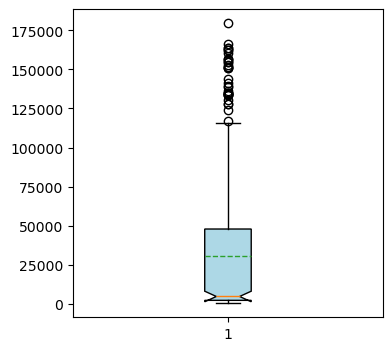

In [15]:
# finding the outliers and the interqurtile range
plt.figure(figsize=(4,4))
plt.boxplot(sales_data['Net Sales Value'],
            patch_artist=True,
            notch=True,
            showmeans=True,
            meanline=True,
            boxprops={'facecolor':'lightblue'},
           )
plt.show()

In [16]:
sales_data['Total Sales Value'].describe()

count       450.000000
mean      33812.835556
std       50535.074173
min         400.000000
25%        2700.000000
50%        5700.000000
75%       53200.000000
max      196400.000000
Name: Total Sales Value, dtype: float64

##### here Q1= 2700, Q2(Median)= 5700, Q3=53200.
##### IQR = Q3-Q1 ->50500
##### Wisher is Q3+1.5IQR 0r max = 128950 or 196400 here it taken 128950 smaller
##### Q1-1.5IQR or min = -73050 0r 400 here it taken 400 larger

### Bar Chart for analysis of categorical data

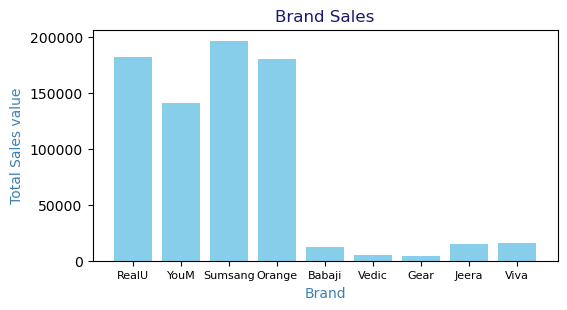

In [17]:
# taking 'Brand' column and analsying the frequency and count,
# need atleast one categorical column to draw bar chart

# plot size  
plt.figure(figsize= (6,3))
# x&y values for the bar chart
plt.bar(sales_data['Brand'], sales_data['Total Sales Value'],
        width= 0.8,
        color= 'skyblue',       
       )
# labels of the chart
plt.title('Brand Sales', fontsize=12, color='midnightblue')
plt.xlabel('Brand', fontsize=10, color='#3D81B3')
plt.ylabel('Total Sales value', fontsize= 10, color='#3D81B3')
# brand overlaped in x-axis
plt.xticks(fontsize=8)

plt.show()

### Cnclusion 

#### Here i find the data's in the numerical columns are varing from extrem low to extrem high,
#### and find the most numerical columns are right skewed.
#### also find the most outliers in 'net sales value' and 'Total sales value'
#### need to remove city column, having only single value over the entire data set.
#### and I think need to remove date and day column as it's same month 15 day's data.